### Initializing the code and data:

In [1]:
# We want to Traditional Techniques on the data.

# Please note: Our original data file is larger than 25MB. It has about 100k samples.
# So we have uploaded a smaler file here, because of GitHub Limit. This smaller file has 5k samples.

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data:
data_clean=pd.read_csv('data_clean.csv')

### Training a single model (here, it's LogisticRegression model):

In [3]:
# Data sampling:
data_clean_sample = data_clean.sample(4000)
X = data_clean_sample.drop('target_tag', axis=1)  
Y = data_clean_sample['target_tag']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [4]:
# We want to use LogisticRegression model to train the data:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train.drop('text', axis=1), Y_train) # (we always drop the text of tweet, and just keep the features)

LogisticRegression()

### Evaluating the model:


As metrics, we want to use confusion matrix first. Because it shows us how many predictions are correct, without considering the importance of each class; no class is superior. On the other hand, some of wrong predictions are important. because some of them show the better choice to classify a Tweet; and some of them show the correlations and overlapping of different classes. For example, 'gym' and 'bodybuilding' are overlapping according to the confusion matrix. Also, almost all the classes have the same number of samples, so we consider weighted score of prediction and recall, and accuracy. As you can see, we have plotted the confusion matrix graphically too, and you can find correlations and overlapping very well. Also, we have printed the total classification report.

In [5]:
# Confusion Matrix:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
df = pd.DataFrame(confusion_matrix(Y_test, clf.predict(X_test.drop('text', axis=1))), columns=list(set(Y_test)))
df.index = list(set(Y_test))

print('The Confusion Matrix, printed as a DataFrame:')
df

The Confusion Matrix, printed as a DataFrame:


,political,covid,government,marketing,fashion,technology,business,medical,culture,food,...,gym,engineering,animal,innovation,solar,physics,science,job,election,biology
political,22,1,3,0,0,0,2,1,0,0,...,0,0,0,0,0,1,1,0,0,1
covid,0,32,2,0,0,0,0,0,0,4,...,1,2,0,0,0,0,1,0,0,4
government,0,1,21,0,0,0,3,0,0,0,...,0,0,0,0,0,0,1,0,1,0
marketing,0,1,0,32,0,1,0,0,0,1,...,0,0,0,0,6,0,0,0,1,0
fashion,0,1,1,0,20,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0
technology,0,0,1,4,0,15,1,3,0,3,...,3,0,0,0,0,1,0,1,2,3
business,0,0,0,0,0,1,30,2,0,1,...,1,2,0,0,0,0,0,0,0,1
medical,0,2,2,0,0,2,1,21,0,0,...,3,1,0,0,0,0,3,0,3,2
culture,0,0,0,0,0,1,0,0,9,0,...,0,0,0,0,0,2,0,0,1,0
food,0,4,0,4,1,0,0,1,0,18,...,2,2,1,0,4,0,1,0,1,0


Plotting the Normalized confusion matrix:


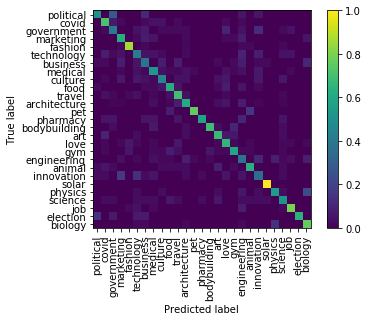

In [6]:
# Plot confusion matrix:
print('Plotting the Normalized confusion matrix:')
plot_confusion_matrix(clf, X_test.drop('text', axis=1), Y_test, 
                      labels = list(set(Y_test)), xticks_rotation='vertical',
                      include_values=False, normalize='true')

In [7]:
# Classification Report
Y_predicted= clf.predict(X_test.drop('text', axis=1))
print('Classification Report: \n {} \n'.format(classification_report(Y_test, Y_predicted) ) )

Classification Report: 
               precision    recall  f1-score   support

      animal       0.73      0.63      0.68        35
architecture       0.63      0.62      0.62        52
         art       0.58      0.68      0.63        31
     biology       0.64      0.76      0.70        42
bodybuilding       0.83      0.69      0.75        29
    business       0.42      0.38      0.40        39
       covid       0.62      0.71      0.67        42
     culture       0.58      0.46      0.51        46
    election       1.00      0.64      0.78        14
 engineering       0.34      0.38      0.36        47
     fashion       0.83      0.87      0.85        45
        food       0.61      0.62      0.61        37
  government       0.52      0.41      0.46        41
         gym       0.75      0.60      0.67        50
  innovation       0.34      0.36      0.35        36
         job       0.80      0.80      0.80        40
        love       0.57      0.66      0.61        47
  

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f'The accuracy score is: {round(accuracy_score(Y_test, Y_predicted), 4)}')
print(f"The weighted precision_score is: {round(precision_score(Y_test, Y_predicted, average='weighted'), 4)}")
print(f"The weighted recall_score is: {round(recall_score(Y_test, Y_predicted, average='weighted'), 4)}")
print(f"The weighted f1_score is: {round(f1_score(Y_test, Y_predicted, average='weighted'), 4)}")

The accuracy score is: 0.61
The weighted precision_score is: 0.6196
The weighted recall_score is: 0.61
The weighted f1_score is: 0.6109


Why LogisticRegression is working well?


As you may noticed, this model can handle overlaps well. This is because the multi-class LogisticRegression model considers a set of weights for each class. These weights look for specific words in a tweet. If they find those words, they will score positively, and if they find inappropriate words, they will score negatively. For this reason, this model can be well trained on our data. Note that our model works significantly based on the word bag model. For this reason, the LogisticRegression model produces acceptable returns. 

### Fine tune the model

CPU times: user 1min 18s, sys: 2.39 s, total: 1min 21s
Wall time: 42.9 s


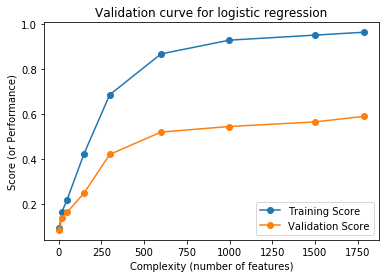

In [9]:
%%time

# Changing the complexity:

'''
In the below link:
https://www.innoarchitech.com/blog/machine-learning-an-in-depth-non-technical-guide-part-3
you can read:

"In machine learning, model complexity often refers to the number of features or terms included in
a given predictive model, as well as whether the chosen model is linear, nonlinear, and so on. It can
also refer to the algorithmic learning complexity or computational complexity."

'''

from numpy import array

all_features=list(data_clean.columns) # list of all the features of the data

features_list = [all_features[:5], all_features[:20], all_features[:50]
                 ,all_features[:150], all_features[:300],all_features[:600],all_features[:1000]
                 ,all_features[:1500], all_features[:-1] ] # keeping various number of features


def score_func(Y_true, Y_prediction): # scoring function
    Y_true=array(Y_true)
    Y_prediction=array(Y_prediction)
    count=0
    for i in range(len(Y_true)):
        if Y_true[i]==Y_prediction[i]: 
            count+=1
    return count/len(Y_true)


clf = LogisticRegression( )
n_avg=5 # how many times we redo the calculation, to find an average
n_s=4000 # number of samples we choose
validation_scores=[]

for f in range(len(features_list)):
    e_in=0
    e_out=0
    for n in range(n_avg):
        sample_data = data_clean.sample(n_s)
        X = sample_data[features_list[f]]
        Y = sample_data['target_tag']

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
        clf = LogisticRegression( )
        clf.fit( X_train.drop('text', axis=1) , Y_train )
        
        e_in  += score_func( Y_train, clf.predict(X_train.drop('text', axis=1) ) )
        e_out += score_func( Y_test , clf.predict(X_test.drop('text', axis=1) )  )

    validation_scores += [[e_in/n_avg, e_out/n_avg]]

    
validation_scores = array(validation_scores)  
complexity = [len(i)-1  for i in features_list] # number of features that we kept

plt.plot(complexity, validation_scores[:,0],'-o', label = 'Training Score')
plt.plot(complexity, validation_scores[:,1],'-o', label = 'Validation Score')
plt.title('Validation curve for logistic regression')
plt.ylabel('Score (or Performance)')
plt.xlabel('Complexity (number of features)')
plt.legend()

 According to the graph above, we can see that if the complexity is greater than 1000 (number of features that we keep), then the logistic regression's scores are fine. We have considered 1785 features, as the complexity; we can't go further. So, we considered 1785 features necessary for training. It shoud be noted that we can take thousands of words, as features; but there is no good thing in such model; because we don't want to use all the words in dictionary!

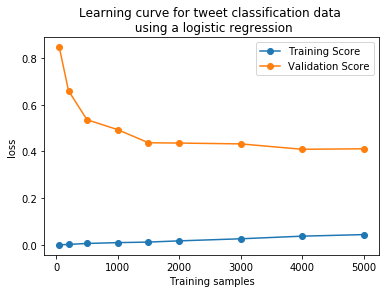

CPU times: user 57.4 s, sys: 1.47 s, total: 58.9 s
Wall time: 29.8 s


In [10]:
%%time

# Learning curve:

from sklearn.metrics import mean_squared_error
from numpy import array

scores_list = []

clf = LogisticRegression()

def loss_func(Y_true, Y_prediction): # definig a loss function
    Y_true=array(Y_true)
    Y_prediction=array(Y_prediction)
    c=0
    for i in range(len(Y_true)):
        if Y_true[i]!=Y_prediction[i]: c+=1
    return c/len(Y_true)
    
    
ns_list = [50, 200, 500, 1000, 1500, 2000, 3000, 4000, len(data_clean)] # number of samples that we want to keep
n_avg = 3  # Number of times to average over

for ns in ns_list:   # For different number of samples, we try training our estimator
    e_in = 0
    e_out = 0   # For each, we record the in and out score. 
    for i in range(n_avg):    
        sample_data = data_clean.sample(ns)
        X = sample_data.drop('target_tag', axis=1) 
        Y = sample_data['target_tag']

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
        clf.fit( X_train.drop('text', axis=1) , Y_train )

        e_in  += loss_func( Y_train, clf.predict(X_train.drop('text', axis=1) ) ) # in-sample error
        e_out += loss_func( Y_test , clf.predict(X_test.drop('text', axis=1) )  ) # out-sample error

    scores_list += [[e_in/n_avg, e_out/n_avg]]

    
scores_list = array(scores_list)  

xlabel = 'Training samples'
ylabel = 'loss'
plt_title = 'Learning curve for tweet classification data \n using a logistic regression'
fig = plt.figure()
ax2 = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax2.plot(ns_list, scores_list[:,0], '-o',label = 'Training Score')
ax2.plot(ns_list, scores_list[:,1], '-o',label = 'Validation Score')
ax2.legend()
plt.show()

IMPORTANT NOTATION: Here, on GitHub, we just put 5000 samples because of 25MB volume limit of GitHub. When we had run the code for all data, in our computer, we have achieved the results below: 

1. Since the curves will almost converge for 100,000 sample of data, we can say the data is enough.


2. We estimate the bias and variance according to the loss_func, as below:

    Bias is about: 0.25

    Variance is about: 0.1

In [11]:
# Regularizing the model:
mini=0 # to find the minimum value of coefficients in weights
maxi=0 # to find the maximum value of coefficients in weights
for coef in clf.coef_:
    if mini>min(coef): mini=min(coef)
    if maxi<max(coef): maxi=max(coef)
        
print(f'The largest coefficient in our logistic regression model is :  {round(maxi,2)}')
print(f'The smallest coefficient in our logistic regression model is: {round(mini,2)}')

print(f"""\nSo, according to the default value of The Inverse of regularization strength, which is c=1, 
(like in support vector machines, smaller values specify stronger regularization),
there is no need to stronger regularization. Because all coefficients are more than {round(mini,2)} 
and less than {round(maxi,2)}.""")

The largest coefficient in our logistic regression model is :  5.08
The smallest coefficient in our logistic regression model is: -1.2

So, according to the default value of The Inverse of regularization strength, which is c=1, 
(like in support vector machines, smaller values specify stronger regularization),
there is no need to stronger regularization. Because all coefficients are more than -1.2 
and less than 5.08.


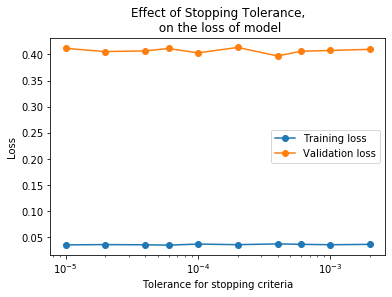

The Best Stopping Tolerance value is: 0.0004

CPU times: user 7min 9s, sys: 8.46 s, total: 7min 17s
Wall time: 3min 43s


In [12]:
%%time

# Other hyper-parameters; fine tunning:

# We want to use 'Tolerance for Stopping Criteria' and 'Maximum number of Iterations', to 
# explore and fine tune them.



# Tolerance for Stopping Criteria:

from numpy import array, argmin

# We want to make a list for different tolerances: tolerance for stopping criteria in Logistic Regression:
tol_list= [0.00001, 0.00002, 0.00004, 0.00006, 0.0001, 0.0002, 0.0004, 0.0006, 0.001, 0.002]
n_avg=10 # how many times we redo the calculation, to find an average
ns=4000 # number of samples we choose

def loss_func(Y_true, Y_prediction):
    Y_true=array(Y_true)
    Y_prediction=array(Y_prediction)
    c=0
    for i in range(len(Y_true)):
        if Y_true[i]!=Y_prediction[i]: c+=1
    return c/len(Y_true)


scores_list = []

for t in tol_list:
    clf = LogisticRegression(tol=t)
    e_in = 0
    e_out = 0   # For each, we record the in and out score. 
    for i in range(n_avg):    
        sample_data = data_clean.sample(ns)
        X = sample_data.drop('target_tag', axis=1) 
        Y = sample_data['target_tag']

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
        clf.fit( X_train.drop('text', axis=1) , Y_train )

        e_in  += loss_func( Y_train, clf.predict(X_train.drop('text', axis=1) ) )
        e_out += loss_func( Y_test , clf.predict(X_test.drop('text', axis=1) )  )

    scores_list += [[e_in/n_avg, e_out/n_avg]]

    
scores_list = array(scores_list)  
    
plt.plot(tol_list, scores_list[:,0], '-o',label = 'Training loss')
plt.plot(tol_list, scores_list[:,1], '-o',label = 'Validation loss')
plt.title('Effect of Stopping Tolerance,\n on the loss of model')
plt.ylabel('Loss')
plt.xlabel('Tolerance for stopping criteria')
plt.xscale('log')
plt.legend()
plt.show()  

print(f'The Best Stopping Tolerance value is: { tol_list [ argmin(scores_list[:,1]) ] }\n')

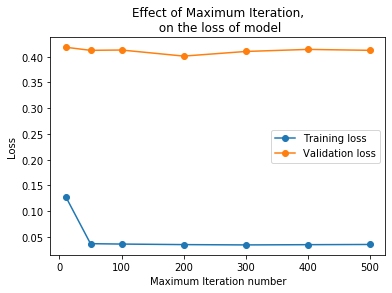

The Best Maximum Iteration value is: 200

CPU times: user 2min 13s, sys: 3.26 s, total: 2min 16s
Wall time: 1min 13s


In [13]:
%%time

# Maximum number of Iterations:

from numpy import array, argmin

# We want to make a list for different Max Iterations:
max_iter_list = [10, 50, 100, 200, 300, 400, 500]
n_avg=5 # how many times we redo the calculation, to find an average
ns=4000 # number of samples we choose

def loss_func(Y_true, Y_prediction):
    Y_true=array(Y_true)
    Y_prediction=array(Y_prediction)
    c=0
    for i in range(len(Y_true)):
        if Y_true[i]!=Y_prediction[i]: c+=1
    return c/len(Y_true)


scores_list = []

for m in max_iter_list:
    clf = LogisticRegression(max_iter=m)
    e_in = 0  # For each, we record the in and out score. 
    e_out = 0   
    for i in range(n_avg):    
        sample_data = data_clean.sample(ns)
        X = sample_data.drop('target_tag', axis=1) 
        Y = sample_data['target_tag']

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
        clf.fit( X_train.drop('text', axis=1) , Y_train )

        e_in  += loss_func( Y_train, clf.predict(X_train.drop('text', axis=1) ) )
        e_out += loss_func( Y_test , clf.predict(X_test.drop('text', axis=1) )  )

    scores_list += [[e_in/n_avg, e_out/n_avg]]

    
scores_list = array(scores_list)  
    
plt.plot(max_iter_list, scores_list[:,0], '-o',label = 'Training loss')
plt.plot(max_iter_list, scores_list[:,1], '-o',label = 'Validation loss')
plt.title('Effect of Maximum Iteration,\n on the loss of model')
plt.ylabel('Loss')
plt.xlabel('Maximum Iteration number')
plt.legend()
plt.show()  

print(f'The Best Maximum Iteration value is: { max_iter_list [ argmin(scores_list[:,1]) ] }\n')

### Try for 5 different kind of models, and comparing them:

In [14]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from time import time

# list of models:
model_list = [LogisticRegression(), DecisionTreeClassifier(), RidgeClassifier(), 
              KNeighborsClassifier(), NearestCentroid()]

n_avg=5 # how many times we redo the calculation, to find an average
ns=4000 # number of samples we choose
duration_fit_list=[]
duration_pred_list=[]
accuracy_score_list=[]
weighted_precision_score_list=[]
weighted_recall_score_list=[]
weighted_f1_score_list=[]

for model in model_list:
    clf=model
    print(model)
    duration_fit=0
    duration_pred=0
    accuracy_scores = 0
    weighted_precision_scores = 0
    weighted_recall_scores = 0
    weighted_f1_scores = 0
        
    for n in range(n_avg):
        
        sample_data = data_clean.sample(ns)
        X = sample_data.drop('target_tag', axis=1) 
        Y = sample_data['target_tag']
        
        start_fit = time()
        clf.fit(X_train.drop('text', axis=1), Y_train)
        end_fit = time()
        duration_fit += end_fit - start_fit # time duration for fitting
        
        start_pred = time()
        Y_pred = clf.predict(X_test.drop('text', axis=1))
        end_pred = time()
        duration_pred += end_pred - start_pred # time duration for predicting
        
        accuracy_scores += round(accuracy_score(Y_test, Y_pred), 4)
        weighted_precision_scores += round(precision_score(Y_test, Y_pred, average='weighted'), 4)
        weighted_recall_scores += round(recall_score(Y_test, Y_pred, average='weighted'), 4)
        weighted_f1_scores += round(f1_score(Y_test, Y_pred, average='weighted'), 4)
    
    duration_fit_list.append(duration_fit/n_avg)
    duration_pred_list.append(duration_pred/n_avg)
    accuracy_score_list.append(accuracy_scores/n_avg)
    weighted_precision_score_list.append(weighted_precision_scores/n_avg)
    weighted_recall_score_list.append(weighted_recall_scores/n_avg)
    weighted_f1_score_list.append(weighted_f1_scores/n_avg)
    

model_list_name = (str(i) for i in model_list) # a list for the names of models

report_data = pd.DataFrame(model_list_name, columns=['model'])
report_data['fit_duration'] = duration_fit_list
report_data['pred_duration'] = duration_pred_list
report_data['accuracy'] = accuracy_score_list
report_data['weighted_precision'] = weighted_precision_score_list
report_data['weighted_recall'] = weighted_recall_score_list
report_data['weighted_f1_score'] = weighted_f1_score_list

report_data

LogisticRegression()
DecisionTreeClassifier()
RidgeClassifier()
KNeighborsClassifier()
NearestCentroid()
CPU times: user 35.4 s, sys: 946 ms, total: 36.4 s
Wall time: 21.8 s


,model,fit_duration,pred_duration,accuracy,weighted_precision,weighted_recall,weighted_f1_score
0,LogisticRegression(),1.953871,0.040556,0.5910,0.6214,0.5910,0.59800
1,DecisionTreeClassifier(),0.728854,0.022356,0.5546,0.5695,0.5546,0.55734
2,RidgeClassifier(),0.481511,0.030070,0.5940,0.6121,0.5940,0.59840
3,KNeighborsClassifier(),0.028364,0.401115,0.2910,0.5039,0.2910,0.32630
4,NearestCentroid(),0.106547,0.028905,0.5380,0.6016,0.5380,0.55550


According to the table above, it seems that 'RidgeClassifier()' and 'LogisticRegression()' are the best choices for our data.